# Topic Modeling using K-Means

### References

* Data: Drug Dataset (400EA)
* Preprocess: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* K-Means: https://lovit.github.io/nlp/2018/09/27/pyldavis_kmeans/#topic=0&lambda=1&term=

### Load Raw Data

In [6]:
import pandas as pd

pd.set_option('display.max_colwidth', 999)
news_data = pd.read_csv('./mallet_top_sen.tsv', sep='\t')

In [7]:
news_data.head()

,Unnamed: 0,id,Topic_Num,Topic_Perc_Contribu,Topic_Keywords,Origin_Text,Text
0,0,44029,0.0,0.2935,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart",Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),"['hazard', 'ratio', 'confid', 'interv', 'univari', 'multivari', 'analysi', 'predictor', 'major', 'cardiac', 'event', 'cardiac', 'death', 'worsen', 'heart', 'failur', 'lead', 'heart', 'transplant']"
1,1,23344,0.0,0.2836,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend","['leav', 'ventricular', 'right', 'ventricular', 'eject', 'fraction', 'leav', 'ventricular', 'right', 'ventricular', 'mean', 'phase', 'leav', 'right', 'mean', 'phase', 'differ', 'rmp', 'phase', 'standard', 'deviat', 'ventricl', 'case', 'leav', 'side', 'wpw']"
2,2,41163,0.0,0.2817,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend","['partial', 'regress', 'coeffici', 'subject', 'forward', 'stepwis', 'linear', 'regress', 'depend', 'variabl', 'augment', 'pressur', 'augment', 'index']"
3,3,23343,0.0,0.2797,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart","Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend","['leav', 'ventricular', 'lvef', 'right', 'ventricular', 'rvef', 'eject', 'fraction', 'leav', 'ventricular', 'lvmp', 'right', 'ventricular', 'rvmp', 'mean', 'phase', 'leav', 'right', 'mean', 'phase', 'differ', 'rmp', 'phase', 'standard', 'deviat', 'lvpsd', 'rvpsd', 'ventricl', 'case', 'right', 'side', 'wpw']"
4,4,24968,0.0,0.2782,"analysi, multivari, regress, variabl, model, predictor, cardiac, time, univari, heart",Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,"['predictor', 'mortal', 'multivari', 'analysi', 'variabl', 'show', 'order', 'enter', 'stepwis', 'cox', 'regress', 'model']"


#### Extract target data

In [4]:
data_text = news_data[['Origin_Text']]
data_text['index'] = news_data[['Unnamed: 0']]
documents = data_text
documents.head()

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Origin_Text,index
0,Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),0
1,"Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend",1
2,"Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend",2
3,"Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend",3
4,Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,4


----

### Preprocessing

* Import Libraries

In [5]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org gensim

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org nltk

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gracelee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* Preprocess
 1. simple_preprocess: Split Text by whitespace
 2. STOPWORDS: Remove stopwords
 3. lemmatize_stemming
 
* lemmatize_stemming
 - Lemmatizing & Stemming Replace word with original form
 - Lemmatizing consider whether the word exist in the real world
 - pos means a position of the word
 - https://m.blog.naver.com/PostView.nhn?blogId=vangarang&logNo=220963244354&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [8]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

* Test

In [9]:
doc_sample = documents[documents['index'] == 100].values[0][0]
print('original document: ')

words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Treatment', 'efficacy', 'at', 'week', '36', 'for', 'the', 'modified', 'intention-to-treat', 'population', 'in', 'the', 'open-label', 'period', 'and', 'at', 'week', '88', 'for', 'the', 'modified', 'intention-to-treat', 'subpopulations', 'in', 'the', 'double-blind', 'period']


 tokenized and lemmatized document: 
['treatment', 'efficaci', 'week', 'modifi', 'intent', 'treat', 'popul', 'open', 'label', 'period', 'week', 'modifi', 'intent', 'treat', 'subpopul', 'doubl', 'blind', 'period']


* Run

In [10]:
%time processed_docs = documents['Origin_Text'].map(preprocess)
processed_docs[:10]

CPU times: user 611 ms, sys: 3.88 ms, total: 615 ms
Wall time: 622 ms


0                                                                                        [hazard, ratio, confid, interv, univari, multivari, analysi, predictor, major, cardiac, event, cardiac, death, worsen, heart, failur, lead, heart, transplant]
1                                           [leav, ventricular, right, ventricular, eject, fraction, leav, ventricular, right, ventricular, mean, phase, leav, right, mean, phase, differ, phase, standard, deviat, ventricl, case, leav, side, legend]
2                                                                                                                   [partial, regress, coeffici, subject, forward, stepwis, linear, regress, depend, variabl, augment, pressur, augment, index, legend]
3    [leav, ventricular, lvef, right, ventricular, rvef, eject, fraction, leav, ventricular, lvmp, right, ventricular, rvmp, mean, phase, leav, right, mean, phase, differ, phase, standard, deviat, lvpsd, rvpsd, ventricl, case, right, side, legend]
4       

----

### T-SNE

* https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
* https://lumiamitie.github.io/r/python/tsne-for-r-py/

In [11]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed(2018)

In [12]:
type(documents['Origin_Text'].values.tolist())

list

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
%time vect.fit([' '.join(d) for d in processed_docs])
%time tsne_data = vect.transform([' '.join(d) for d in processed_docs]).toarray()

CPU times: user 26.2 ms, sys: 1.73 ms, total: 27.9 ms
Wall time: 28.3 ms
CPU times: user 22 ms, sys: 2.97 ms, total: 24.9 ms
Wall time: 25.3 ms


In [14]:
%time tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(np.array(tsne_data))

CPU times: user 16.6 s, sys: 932 ms, total: 17.5 s
Wall time: 17.4 s


In [15]:
tsne_result[:10]

array([[  9.664474  ,   8.992035  ],
       [ 23.601093  , -15.2017975 ],
       [ 11.646137  ,   0.97763896],
       [ 23.60182   , -15.202716  ],
       [  8.242556  ,   3.2811804 ],
       [ 13.225922  ,  -0.97631407],
       [  5.6147494 ,   8.802479  ],
       [  4.419053  ,   8.055964  ],
       [ 12.462818  ,  -1.2678202 ],
       [  9.879312  ,   5.7678313 ]], dtype=float32)

----

### Elbow Method For Optimal K

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [17]:
X = normalize(tsne_data, norm='l2')

ssd = []
K = range(1,30)

import time
start_time = time.time() 

for k in K:
    km = KMeans(n_clusters=k, init='random', max_iter=30000).fit(X)
    ssd.append(km.inertia_)
    
print("--- %s mins ---" % str((time.time() - start_time) / 60.))

--- 0.3418961683909098 mins ---


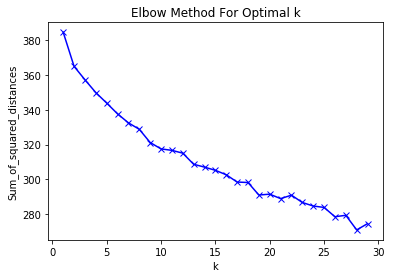

In [32]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
pd.DataFrame(ssd, columns = ['Sum_of_squared_distances'])

,Sum_of_squared_distances
0,384.427808
1,364.856404
2,357.155231
3,349.801498
4,343.803397
5,337.593582
6,332.446348
7,328.740112
8,321.154425
9,317.491980


----

### K-Means

In [16]:
docs = list(documents.Origin_Text.values)

# # vectorizing
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(docs)

# # L2 normalizing
# X = normalize(X, norm='l2')

In [17]:
X = normalize(tsne_data, norm='l2')

In [18]:
kmeans_model = KMeans(n_clusters=8, init="random", max_iter=30000).fit(X)

In [19]:
# trained labels and cluster centers
labels = kmeans_model.labels_
centers = kmeans_model.cluster_centers_

In [38]:
centers[0]

array([ 2.60208521e-18, -2.16840434e-19,  1.30104261e-18, ...,
        6.50521303e-19,  8.67361738e-19, -6.50521303e-19])

In [20]:
for i in range(8):
    print(i, np.sum(labels == i))

0 83
1 47
2 32
3 62
4 55
5 17
6 55
7 49


----

### K-Means 결과를 LDAvis로 시각화
* https://lovit.github.io/nlp/2018/09/27/pyldavis_kmeans/#topic=0&lambda=1&term=

* topic_term_dists
* doc_topic_dists
* doc_lengths
* vocab
* term_frequency

In [21]:
len(centers[1])

1240

In [22]:
import numpy as np

doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)

In [23]:
docwords = list(processed_docs.apply(lambda x: len(x)).values)
vocab = list(set(np.sum(processed_docs.values)))

In [24]:
from kmeans_to_pyLDAvis import kmeans_to_prepared_data

vis_data = kmeans_to_prepared_data(
    X,
    vocab,
    centers,
    labels,
    n_printed_words = 10,
    radius = 5
)

----

### Visualization

#### 1. HBar Chart

In [25]:
import json

hbar_json = {}
hbar_json['labels'] = vis_data.topic_info.Category.unique().tolist()
hbar_json['max_width'] = vis_data.topic_info[vis_data.topic_info.Category != 'Default'][['Total']].max()[0]
for l in vis_data.topic_info.Category.unique().tolist():
    tmp_df = vis_data.topic_info[vis_data.topic_info.Category == l].sort_values(['Category', 'Freq'], ascending=[True, False]).groupby('Category').head()
    sub_json = {}

    hbar_json[l] = list(tmp_df[['Term', 'Freq', 'Total']].sort_values('Freq', ascending=False).reset_index().to_dict('index').values())
    
f = open('./Visualization/res/km/hbar_data.json', 'w')
f.write(json.dumps(hbar_json, indent=4))
f.close()

#### 2. Scatter Chart

In [26]:
doc_result = documents[['index', 'Origin_Text']]
doc_result.columns = ['id', 'document']
doc_result['topic'] = kmeans_model.labels_
doc_result = pd.merge(doc_result, pd.DataFrame(tsne_result, columns=['plot_x', 'plot_y']), left_index=True, right_index=True)

doc_result.head()

/Users/gracelee/.pyenv/versions/for_jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,document,topic,plot_x,plot_y
0,0,Hazard Ratio (and 95% Confidence Intervals) in Univariate and Multivariate Analysis of Predictors of Major Cardiac Events (Cardiac Death or Worsening of Heart Failure Leading to Heart Transplantation),7,9.664474,8.992035
1,1,"Left Ventricular and Right Ventricular Ejection Fractions, Left Ventricular and Right Ventricular Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations for Both Ventricles in 30 Cases of Left Sided WPW legend",3,23.601093,-15.201797
2,2,"Partial Regression Coefficients (All Subjects, n = 262) for Forward Stepwise Linear Regression for Dependent Variables Augmentation Pressure and Augmentation Index legend",7,11.646137,0.977639
3,3,"Left Ventricular (LVEF) and Right Ventricular (RVEF) Ejection Fractions, Left Ventricular (LVMP) and Right Ventricular (RVMP) Mean Phases, Left-to-Right Mean Phase Difference (L-RMP) and Phase Standard Deviations (LVPSD and RVPSD) for Both Ventricles in 14 Cases of Right Sided WPW legend",3,23.601820,-15.202716
4,4,Predictors of Mortality by Multivariable Analysis: Variables Are Shown in the Order They Entered a Stepwise Cox Regression Model,7,8.242556,3.281180


In [27]:
scatter_json = list(doc_result[['id', 'plot_x', 'plot_y', 'topic']].to_dict('index').values())

f = open('./Visualization/res/km/scatter_data.json', 'w')
f.write(json.dumps(scatter_json, indent=4))
f.close()

#### 3. Table

In [28]:
import collections

doc_result['topic_word'] = processed_docs
doc_result['words_count'] = doc_result.topic_word.apply(lambda x : len(x))

topic_words = {}
for i in doc_result.topic.unique():
    topic_words[i] = sorted({k: '%.2f' % (dict(collections.Counter(np.sum(doc_result[doc_result.topic == i].topic_word.values)))[k] / doc_result[doc_result.topic == i].words_count.sum() * 100) \
    for k in dict(collections.Counter(np.sum(doc_result[doc_result.topic == i].topic_word.values)))}.items(), key=lambda kv: kv[1], reverse=True)[:10]
    
doc_result.topic_word = doc_result.apply(lambda x: topic_words[x.topic], axis=1)

In [29]:
doc_result.to_csv('./data_output/km.tsv', sep='\t', index_label=False)

In [30]:
doc_result.groupby('topic').head(1)[['topic', 'topic_word']]

,topic,topic_word
0,7,"[(regress, 4.34), (model, 3.90), (analysi, 3.90), (multivari, 3.32), (hazard, 2.89), (variabl, 2.89), (proport, 2.75), (predictor, 2.31), (cardiac, 2.17), (mortal, 2.02)]"
1,3,"[(coronari, 4.33), (valu, 1.96), (sensit, 1.55), (arteri, 1.55), (wall, 1.44), (ventricular, 1.44), (legend, 1.44), (leav, 1.34), (detect, 1.34), (angiographi, 1.34)]"
25,0,"[(vaccin, 1.82), (efficaci, 1.57), (accord, 1.41), (intervent, 1.16), (cohort, 1.16), (sever, 0.91), (area, 0.91), (respons, 0.91), (level, 0.91), (liter, 0.83)]"
37,6,"[(patient, 8.09), (hospit, 2.52), (myocardi, 1.99), (infarct, 1.99), (outcom, 1.86), (acut, 1.72), (legend, 1.72), (random, 1.46), (clinic, 1.46), (complic, 1.33)]"
52,5,"[(countri, 5.26), (health, 5.26), (modern, 5.26), (child, 4.45), (method, 4.45), (develop, 4.05), (matern, 3.64), (assist, 3.24), (newborn, 3.24), (offici, 3.24)]"
83,4,"[(year, 5.81), (death, 3.91), (caus, 3.24), (cancer, 2.91), (standardis, 2.57), (rat, 2.35), (relat, 2.12), (ratio, 2.01), (adjust, 2.01), (mortal, 1.90)]"
101,1,"[(treatment, 9.70), (grade, 4.68), (patient, 4.68), (popul, 4.01), (emerg, 3.68), (safeti, 3.68), (group, 3.51), (relat, 2.68), (occur, 2.34), (studi, 2.17)]"
350,2,"[(risk, 9.64), (score, 6.73), (stroke, 5.61), (factor, 3.59), (patient, 3.14), (vasc, 3.14), (ischaem, 2.69), (associ, 1.79), (relat, 1.57), (aphasia, 1.35)]"


In [31]:
doc_result.groupby('topic').agg({'id': 'unique'})

,id
topic,
0,"[25, 50, 51, 53, 54, 60, 63, 65, 66, 69, 75, 76, 78, 79, 80, 82, 85, 86, 88, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 115, 140, 156, 163, 174, 177, 187, 250, 251, 252, 253, 256, 257, 258, 259, 260, 263, 265, 266, 267, 269, 271, 273, 279, 280, 281, 282, 283, 284, 286, 287, 289, 291, 293, 294, 295, 297, 298, 299, 301, 302, 318, 340, 346, 366, 371, 376, 377, 379, 385, 386, 388, 391, 394]"
1,"[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 186]"
2,"[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 368, 369, 370, 373, 374, 378, 380, 382, 384, 387, 390, 392, 393, 395, 398, 399]"
3,"[1, 3, 8, 10, 14, 31, 35, 36, 154, 155, 161, 254, 255, 262, 264, 268, 272, 274, 276, 278, 288, 290, 300, 303, 304, 305, 306, 307, 308, 310, 313, 314, 315, 316, 317, 319, 320, 322, 323, 324, 325, 326, 327, 328, 329, 331, 332, 333, 334, 335, 336, 337, 338, 339, 341, 342, 343, 344, 345, 347, 348, 349]"
4,"[83, 87, 91, 96, 195, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 275]"
5,"[52, 55, 56, 57, 58, 59, 62, 64, 67, 70, 71, 72, 73, 74, 77, 81, 84]"
6,"[37, 68, 128, 150, 151, 152, 153, 157, 158, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 261, 270, 277, 285, 292, 296, 309, 330, 375, 383, 396, 397]"
7,"[0, 2, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 61, 220, 311, 312, 321, 367, 372, 381, 389]"
